# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [237]:
!ls

import pandas as pd


Dataset ONE - Beer cans.ipynb craftcans.csv


## Read in the file `craftcans.csv`, and look at the first first rows

In [242]:
df = pd.read_csv("craftcans.csv")
df.head(10)


,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42


## How many rows do you have in the data? What are the column types?

In [243]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.3+ KB


Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [244]:
df.groupby('Style')["Brewery"].value_counts().head(10).reset_index()

,Style,Brewery,count
0,Abbey Single Ale,Destihl Brewery,2
1,Altbier,Center of the Universe Brewing C...,2
2,Altbier,Long Trail Brewing Company,2
3,Altbier,Alaskan Brewing Company,1
4,Altbier,Bohemian Brewery,1
5,Altbier,Cheboygan Brewing Company,1
6,Altbier,Grimm Brothers Brewhouse,1
7,Altbier,Hops & Grain Brewery,1
8,Altbier,Occidental Brewing Company,1
9,Altbier,Sun King Brewing Company,1


## What is the most common ABV? (alcohol by volume)

In [245]:
most_common_ABV = df["ABV"].value_counts().head(1).reset_index()
most_common_ABV


,ABV,count
0,5.00%,215


## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [246]:
df["ABV"].reset_index()

,index,ABV
0,0,4.50%
1,1,4.90%
2,2,4.80%
3,3,6.00%
4,4,6.00%
...,...,...
2411,2411,5.30%
2412,2412,9.90%
2413,2413,8.00%
2414,2414,8.70%


### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [247]:
df['ABV'].describe()

count      2348
unique       74
top       5.00%
freq        215
Name: ABV, dtype: object

In [248]:
df['ABV'] = df['ABV'].str.replace("%", "")
df['ABV']

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [249]:
df['ABV'] = df['ABV'].astype(float)
df['ABV'].reset_index()

,index,ABV
0,0,4.5
1,1,4.9
2,2,4.8
3,3,6.0
4,4,6.0
...,...,...
2411,2411,5.3
2412,2412,9.9
2413,2413,8.0
2414,2414,8.7


In [250]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [251]:
df['ABV'].mean()

np.float64(5.977342419080068)

In [252]:
df['ABV'].median()

np.float64(5.6)

<Axes: ylabel='Frequency'>

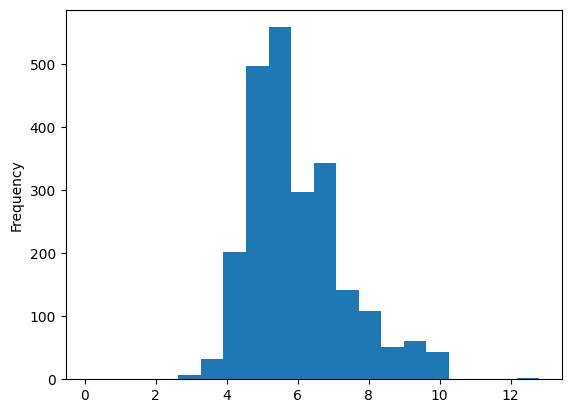

In [253]:
df['ABV'].plot(kind = 'hist', bins=20)

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [254]:
df[df['ABV'].isnull()]



,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,Does not apply
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,Does not apply
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,Does not apply
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,Does not apply
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,Does not apply
...,...,...,...,...,...,...,...
2357,Lift Bridge Brown Ale,Keweenaw Brewing Company,"Houghton, MI",American Brown Ale,12 oz.,NaN,Does not apply
2358,Pick Axe Blonde Ale,Keweenaw Brewing Company,"Houghton, MI",American Blonde Ale,12 oz.,NaN,Does not apply
2359,Red Jacket Amber Ale,Keweenaw Brewing Company,"Houghton, MI",American Amber / Red Ale,12 oz.,NaN,Does not apply
2374,(16 oz.) (2010),NaN,NaN,NaN,NaN,NaN,NaN


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [255]:
df["Location"].value_counts().head(10).reset_index()

,Location,count
0,"Grand Rapids, MI",66
1,"Chicago, IL",55
2,"Portland, OR",52
3,"Indianapolis, IN",43
4,"San Diego, CA",42
5,"Boulder, CO",41
6,"Denver, CO",40
7,"Brooklyn, NY",38
8,"Seattle, WA",35
9,"Longmont, CO",33


## List all of the beer from Brooklyn, NY

In [256]:
df[df["Location"] == "Brooklyn, NY"]["Beer"].reset_index()
# df[df["Location"] == "Brooklyn, NY"]


,index,Beer
0,115,4Beans
1,210,Jammer
2,246,Abigale
3,404,Nomader Weiss
4,421,Rad
5,439,Molotov Lite
6,588,Bengali
7,713,Sensi Harvest
8,969,Hi-Res
9,987,KelSo Nut Brown Lager


## What brewery in Brooklyn puts out the most different cans of beer?

In [257]:
df[df["Location"] == "Brooklyn, NY"]["Brewery"].value_counts().reset_index()

,Brewery,count
0,Sixpoint Craft Ales,24
1,Brooklyn Brewery,6
2,Evil Twin Brewing,5
3,KelSo Beer Company,3


## What are the five most common styles of beer produced by Sixpoint?

In [258]:
df[df["Brewery"] == "Sixpoint Craft Ales"]["Style"].value_counts().head(5).reset_index()


,Style,count
0,American IPA,4
1,Baltic Porter,2
2,American Double / Imperial IPA,2
3,German Pilsener,2
4,Cream Ale,2


## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [259]:
df[df["Location"].str.contains('NY', na=False)]["Brewery"].reset_index()


,index,Brewery
0,115,Sixpoint Craft Ales
1,210,Sixpoint Craft Ales
2,246,Sixpoint Craft Ales
3,404,Evil Twin Brewing
4,421,Sixpoint Craft Ales
...,...,...
69,2351,Brooklyn Brewery
70,2364,Butternuts Beer and Ale
71,2365,Butternuts Beer and Ale
72,2366,Butternuts Beer and Ale


### Now *count* all of the breweries in New York state

In [260]:
df[df["Location"].str.contains('NY', na=False)]["Brewery"].value_counts().reset_index()


,Brewery,count
0,Sixpoint Craft Ales,24
1,Matt Brewing Company,13
2,Brooklyn Brewery,6
3,Evil Twin Brewing,5
4,Blue Point Brewing Company,4
5,Butternuts Beer and Ale,4
6,The Bronx Brewery,3
7,KelSo Beer Company,3
8,Chatham Brewing,2
9,Montauk Brewing Company,2


# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [261]:
df[df["Style"].str.contains('IPA', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [262]:
df['IBUs'].median()

TypeError: Cannot convert ['50' '26' '19' ... '35' '85' '65'] to numeric

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [278]:
# df['IBUs'] = pd.to_numeric(df['IBUs'], errors='coerce')
df['IBUs'] = df['IBUs'].dropna()
df['IBUs'].median()


np.float64(35.0)

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: ylabel='Frequency'>

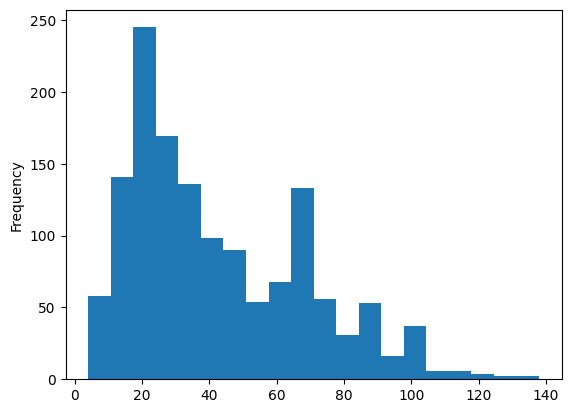

In [279]:
df['IBUs'].plot(kind='hist', bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [280]:
percentile_75 = df['IBUs'].quantile(0.75)
high_ibu_beers = df[df['IBUs'] > percentile_75]
high_ibu_beers

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List all of the beers with IBUs below the 25th percentile

In [284]:
percentile_25 = df['IBUs'].quantile(0.25)
low_ibu_beers = df[df['IBUs'] < percentile_25]
low_ibu_beers

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

<Axes: ylabel='Style'>

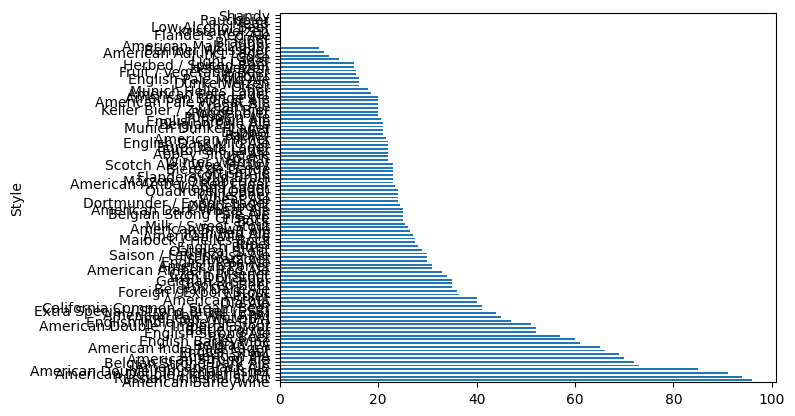

In [285]:
median_ibus = df.groupby('Style')['IBUs'].median().sort_values(ascending=False)
median_ibus
median_ibus.plot(kind='barh')


## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [297]:
high_ibu_style = high_ibu_beers['Style'].value_counts()
top_5_high = high_ibu_style.head(5)
top_5_high




Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [298]:
low_ibu_style = low_ibu_beers['Style'].value_counts()
top_5_low = low_ibu_style.head(5)
top_5_low




Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [314]:
wheat_styles = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]
wheat_beers = df[df['Style'].isin(wheat_styles)].reset_index()
average_ibu = wheat_beers['IBUs'].mean()
average_ibu


np.float64(18.982142857142858)

## Draw a histogram of the IBUs of those beers

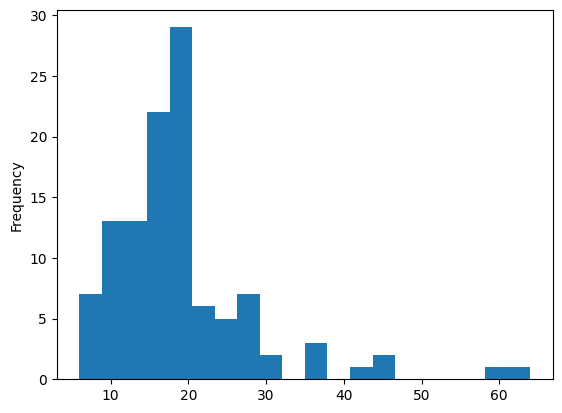

In [315]:
ibu = wheat_beers['IBUs'].plot(kind = 'hist', bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [316]:
df[df['Style'].str.contains('IPA', na=False)]['IBUs'].median()

np.float64(70.0)

<Axes: >

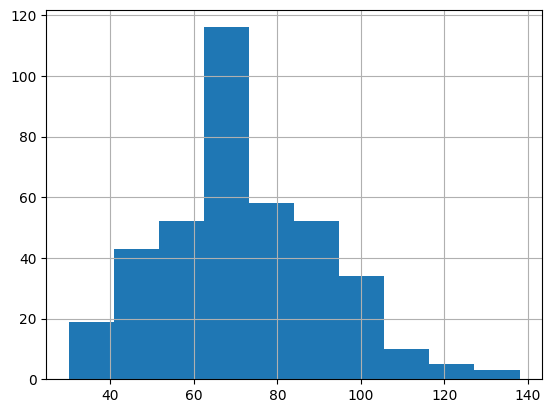

In [317]:
df[df['Style'].str.contains('IPA', na=False)]['IBUs'].hist()

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

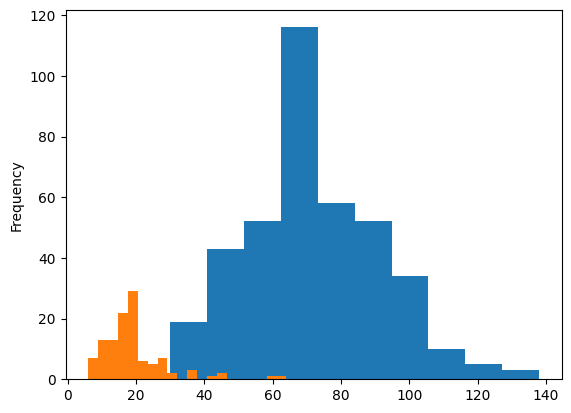

In [318]:
df[df['Style'].str.contains('IPA', na=False)]['IBUs'].hist()

ibu = wheat_beers['IBUs'].plot(kind = 'hist', bins=20)


## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [322]:
wheat_beers = df[df['Style'].isin(wheat_styles)].reset_index()
wheat_beers['ABV'].median()

np.float64(5.0)

In [323]:
ipa = df[df['Style'].str.contains("IPA", na=False)]
average_ipa = ipa['ABV'].median()
average_ipa

np.float64(6.8)

## Good work!

In [ ]:
#YOU GIVE TOO MUCH HOMEWORK AND IT IS TOO LENGTHY, SOMA!!! BUT YEAH, IT IS NEEDED FOR LEARNING.